In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/My\ Drive/Colab\ Notebooks/Research \Models/Kameris \Models

/content/drive/My Drive/Colab Notebooks/Research Models/Kameris Models


In [0]:
import numpy as np
import os
import sys
import pickle
from helpers import getStats, plotDict, genome2tabInt,plot_confusion_matrix, kmer_count, build_pipeline, plot_confusion_matrix 
from sklearn.preprocessing import normalize
from scipy.spatial import distance
import json 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
from itertools import product
from sklearn.preprocessing import StandardScaler



## Load training data 

-----------some stats: ------------
total num of classes:  36
total num of samples:  5734
max genome length:  24307
occurences: 
C        =>     1124
35_AD    =>       18
63_02A   =>        6
71_BF1   =>        9
02A      =>       10
A6       =>       53
14_BG    =>       10
01_AE    =>      704
02_AG    =>      108
01B      =>       86
N        =>        8
11_cpx   =>       19
02G      =>       11
CD       =>       47
D        =>       64
G        =>       61
08_BC    =>       27
42_BF    =>       15
01C      =>        9
22_01A1  =>       14
A1CD     =>       18
U        =>       17
07_BC    =>       35
O        =>       35
01BC     =>       17
BF1      =>      116
B        =>     2492
F1       =>       54
0107     =>       21
06_cpx   =>       13
A1       =>      249
A1C      =>       90
02A1     =>       19
BC       =>       72
A1D      =>       72
BG       =>       11
-----------------------------------


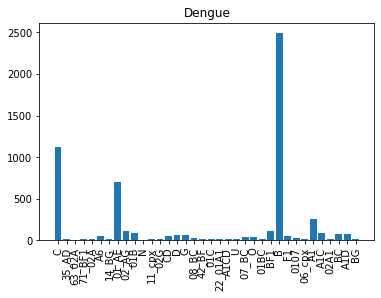

{'C': 1, '35_AD': 2, '63_02A': 3, '71_BF1': 4, '02A': 5, 'A6': 6, '14_BG': 7, '01_AE': 8, '02_AG': 9, '01B': 10, 'N': 11, '11_cpx': 12, '02G': 13, 'CD': 14, 'D': 15, 'G': 16, '08_BC': 17, '42_BF': 18, '01C': 19, '22_01A1': 20, 'A1CD': 21, 'U': 22, '07_BC': 23, 'O': 24, '01BC': 25, 'BF1': 26, 'B': 27, 'F1': 28, '0107': 29, '06_cpx': 30, 'A1': 31, 'A1C': 32, '02A1': 33, 'BC': 34, 'A1D': 35, 'BG': 36}


In [7]:
TrainDataFile = '../data/HIV/train.p'

train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))

#get some stats about training and testing dataset
diTrain = getStats(train)
plotDict(diTrain, 'train.png','Dengue')

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

for item in diTrain:
    classId += 1
    diLabels[item] = classId;
    
print(diLabels)


-----------some stats: ------------
total num of classes:  19
total num of samples:  5510
max genome length:  24307
occurences: 
0107     =>       21
C        =>     1124
A1       =>      249
CD       =>       47
O        =>       35
D        =>       64
G        =>       61
08_BC    =>       27
A1C      =>       90
A6       =>       53
BC       =>       72
02_AG    =>      108
01_AE    =>      704
A1D      =>       72
BF1      =>      116
B        =>     2492
F1       =>       54
07_BC    =>       35
01B      =>       86
-----------------------------------


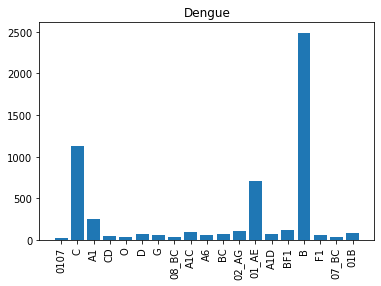

{'0107': 21, 'C': 1124, 'A1': 249, 'CD': 47, 'O': 35, 'D': 64, 'G': 61, '08_BC': 27, 'A1C': 90, 'A6': 53, 'BC': 72, '02_AG': 108, '01_AE': 704, 'A1D': 72, 'BF1': 116, 'B': 2492, 'F1': 54, '07_BC': 35, '01B': 86}


In [8]:
## Let's delete all the missrepresented classes. 

# Select the minimun amount of elements per class
minimum = 20

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(diTrain)

i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the training dataset
diTrain = getStats(train)
plotDict(diTrain, 'train.png','Dengue')
print(diTrain)


In [0]:
n_train = len(train)
k = 5
train_features = []
train_labels = []
a_size = int(np.sqrt(4**k))

unique_labels = list(set(map(lambda x: x[0], train)))
numClasses = len(unique_labels)

for i in range(len(train)):

    t = kmer_count(train[i][1],k)
    train_features.append(t)
    train_labels.append(train[i][0])
    
x_train = np.asarray(train_features).astype('float32')
y_train = np.asarray(train_labels)



-----------some stats: ------------
total num of classes:  36
total num of samples:  1433
max genome length:  24307
occurences: 
C        =>      263
35_AD    =>        4
63_02A   =>        5
71_BF1   =>        4
02A      =>        3
A6       =>       13
01_AE    =>      180
14_BG    =>        3
02_AG    =>       28
01B      =>       19
N        =>        3
11_cpx   =>        5
02G      =>        1
CD       =>       14
08_BC    =>        8
G        =>       26
D        =>       19
42_BF    =>        2
01C      =>        1
22_01A1  =>        4
A1CD     =>        6
U        =>        3
07_BC    =>        6
O        =>       18
01BC     =>        8
F1       =>       10
B        =>      612
BF1      =>       29
0107     =>        2
06_cpx   =>        1
A1       =>       64
A1C      =>       21
02A1     =>        6
BC       =>       17
A1D      =>       24
BG       =>        1
-----------------------------------


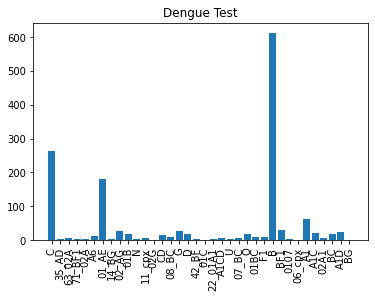

In [11]:
TestDataFile = '../data/HIV/test.p'
test = pickle.load(open(TestDataFile, "rb"))

#get some stats about training and testing dataset
diTrain = getStats(test)
plotDict(diTrain, 'test.png','Dengue Test')

test_features = []
test_labels = []

for i in range(len(test)):

    t = kmer_count(test[i][1],k)
    test_features.append(t)
    test_labels.append(test[i][0])
    
x_test = np.asarray(test_features).astype('float32')
y_test = np.asarray(test_labels)



In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn import svm

# This is the machine Learning Pipeline, taken from Kameris
#-----------------------------------------------
def build_pipeline(num_features):

    normalize_features = True
    dim_reduce_fraction = 0.1

    # setup normalizers if needed
    normalizers = []

    normalizers.append(('scaler', StandardScaler(with_mean=False)))

    # reduce dimensionality to some fraction of its original
    # normalizers.append(('dim_reducer',TruncatedSVD(n_components=int(
    #                     np.ceil(num_features * dim_reduce_fraction)))))

    # Classifier
    normalizers.append(('classifier',svm.SVC(kernel='linear')))

    return Pipeline(normalizers)

In [13]:
# Build, train and test the classifier.
print(x_train.shape,y_train.shape)
pipeline = build_pipeline(1024)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

(5510, 1024) (5510,)


In [14]:
print(y_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

['B' 'B' 'B' ... 'A1D' 'B' 'B']
['B' 'B' 'B' ... 'A1D' 'B' 'B']
0.933705512909979
